This notebook contains code for testing out pretrained models: ResNet-101 and AlexNet for single label classification task.

Both of them are deep NN and are both pretrained on the ImageNet dataset. The ImageNet dataset contains around 14 million images and 1000 classes.

In [1]:
from PIL import Image

In [2]:
img = Image.open("pizza.jpg")

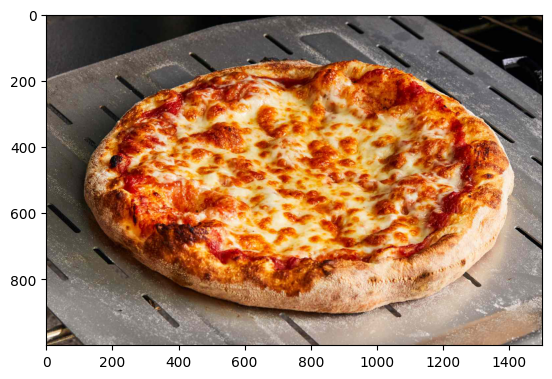

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [5]:
from torchvision import transforms

transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor(),
 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [6]:
img_t  = transform(img)

In [7]:
print(img_t.shape)

torch.Size([3, 224, 224])


In [9]:
import torch

img_bt = torch.unsqueeze(img_t, 0) # add batch dimension; this dimension represents the number of images in the batch, which is 1 in this case. also, this is the required input shape for both ResNet and AlexNet.

print(img_bt.shape)

torch.Size([1, 3, 224, 224])


In [10]:
from torchvision import models

resnet = models.resnet101(pretrained=True)
resnet.eval() # set the model to evaluation mode to do the predictions

c:\Users\alshe\anaconda3\envs\venv1\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\alshe\anaconda3\envs\venv1\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\alshe/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:25<00:00, 7.11MB/s] 


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
# prediction
out = resnet(img_bt) # this will predic the id of the class with the highest probability, not the name of the class

In [12]:
# get the class id and use it to get the class name to use in the prediction
with open("imagenet1000Classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [13]:
# find the predicted index/class id with the maximum probability
_, index = torch.max(out, 1)
percentage = torch.softmax(out, dim=1)[0] * 100

print(labels[index[0]], percentage[index[0]].item()) # print the class name and the probability

963: 'pizza, pizza pie', 99.99467468261719


In [14]:
# using AlexNet
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

out = alexnet(img_bt)

_, index = torch.max(out, 1)
percentage = torch.softmax(out, dim=1)[0] * 100

print(labels[index[0]], percentage[index[0]].item()) # print the class name and the probability

c:\Users\alshe\anaconda3\envs\venv1\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\alshe\anaconda3\envs\venv1\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


963: 'pizza, pizza pie', 99.9948959350586
